Evaluation of the Deep-DSCM on synthetic dataset

-----------------------------Using GPU-----------------------------
FHWM of confocal psf: 249.43359375
FHWM of cal psf: 234.31640625


1 / 1: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

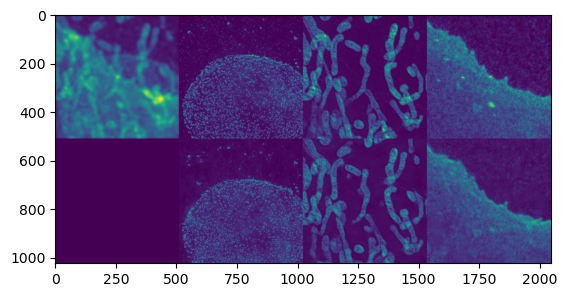

1 / 1: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

NPCs_Mito_inner_Membrane  NRMAE_NPCs: 0.0527, NRMAE_Mito_inner: 0.0375, NRMAE_Membrane: 0.0414


In [ ]:
## This is a demo of NPCs & Inner Mitochondria Membrane & Plasma membrane (synthetic data), the output images and numeric results will be saved at \\evaluation\\NPCs_Mito_inner_Membrane. 
## In the shown plot, the first row includes Input and GT, the second row includes the output of the network. 

from evaluation_synthetic import *

cwd = os.getcwd()
train_dir_LR =  os.path.join(cwd, "data\\train_LR")
test_dir_LR = os.path.join(cwd, "data\\test_LR")
train_dir_HR = os.path.join(cwd, "data\\train_HR")
test_dir_HR = os.path.join(cwd, "data\\test_HR")

org_list = ['NPCs', 'Mito_inner_deconv', 'Membrane']
factor_list = [1, 1, 1]
noise_level = 0
eval_dir = os.path.join(cwd, 'data\\demo_synthetic_data\\NPCs_Mito_inner_Membrane')
model_dir = os.path.join(cwd, "models\\NPCs_Mito_inner_Membrane.pth")
model = torch.load(model_dir)
save_dir = os.path.join(cwd, 'evaluation\\NPCs_Mito_inner_Membrane')
num_eval = 1
eval_dataloader = gen_eval_dataloader(test_dir_HR=test_dir_HR, test_dir_LR=test_dir_LR, GT_tag_list=org_list, noise_level=noise_level, factor_list=factor_list, num_test=num_eval, size=512, w0=2.0)

score_list = evaluation(model=model, eval_dataloader=eval_dataloader, num_test=num_eval, device=device, noise_level=noise_level, save_dir=save_dir, org_list=org_list)
print(f"NPCs_Mito_inner_Membrane  NRMAE_NPCs: {score_list[0]:.4f}, NRMAE_Mito_inner: {score_list[1]:.4f}, NRMAE_Membrane: {score_list[2]:.4f}")



Visualization of Deep-DSCM on real dataset

0:  50%|█████     | 1/2 [00:00<00:00,  3.62it/s]

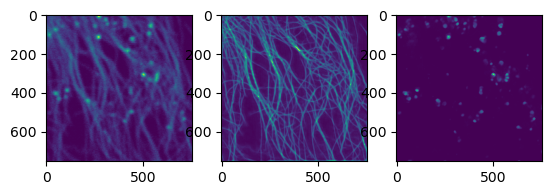

0: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]


In [ ]:
## This is a demo of Microtubules & Lysosomes, the images will be saved at \\visualization\\Micro_Lyso\\results. 

from visualization import *
cwd = os.getcwd()
# Micro-Lyso
weights_dir = os.path.join(cwd, 'models\\Micro_Lyso.pth')
read_dir_folder = os.path.join(cwd, 'visualization\\Micro_Lyso')
decouple_test_folder(weights_dir=weights_dir, read_dir=read_dir_folder)